<a href="https://colab.research.google.com/github/rochak94/info-mis-6105-Assignment2/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [238]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import seaborn as sns

In [239]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [240]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

2


In [241]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:10263 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpx31j1mhj
  JVM stdout: /tmp/tmpx31j1mhj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpx31j1mhj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:10263
Connecting to H2O server at http://127.0.0.1:10263 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_co27hc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [242]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [243]:
df.head()

HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8
0,1,0,1,30,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7
0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,4,4
1,1,1,1,30,1,0,2,0,1,1,0,1,0,5,30,30,1,0,9,5,1
0,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,4,3


In [244]:
df.types

{'Age': 'int',
 'AnyHealthcare': 'int',
 'BMI': 'int',
 'CholCheck': 'int',
 'Diabetes': 'int',
 'DiffWalk': 'int',
 'Education': 'int',
 'Fruits': 'int',
 'GenHlth': 'int',
 'HeartDiseaseorAttack': 'int',
 'HighBP': 'int',
 'HighChol': 'int',
 'HvyAlcoholConsump': 'int',
 'Income': 'int',
 'MentHlth': 'int',
 'NoDocbcCost': 'int',
 'PhysActivity': 'int',
 'PhysHlth': 'int',
 'Sex': 'int',
 'Smoker': 'int',
 'Stroke': 'int',
 'Veggies': 'int'}

In [245]:
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].asfactor()

In [246]:
df.describe()

Rows:253680
Cols:22




,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
type,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
mean,,0.4290011037527594,0.4241209397666351,0.9626695048880479,28.382363607694742,0.44316855881425415,0.04057079785556607,0.2969213181961528,0.7565436770734784,0.6342557552822453,0.811419899085462,0.05619678334910123,0.9510525070955534,0.08417691579943236,2.5113923052664693,3.1847721538946727,4.2420805739514185,0.16822374645222327,0.4403421633554084,8.032119205297999,5.050433617155479,6.053874960580254
maxs,,1.0,1.0,1.0,98.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,1.0,13.0,6.0,8.0
sigma,,0.49493446268990143,0.4942098046568848,0.1895707543627255,6.608694201406014,0.4967606667785632,0.19729409940016238,0.6981597284091015,0.4291690433970456,0.4816391871704334,0.3911754716844908,0.2303017888952292,0.2157587063107391,0.277653500857625,1.0684773622803956,7.4128466961961745,8.717951307175133,0.3740655947328031,0.4964291631185051,3.054220434168483,0.9857741757276512,2.071147566271517
zeros,,144851,146089,9470,0,141257,243388,213703,61760,92782,47839,239424,12417,232326,0,175680,160052,211005,141974,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [247]:
# Create a 80/20 train/test splie
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [248]:
print(df_train.shape)
print(df_test.shape)

(203011, 22)
(50669, 22)


In [249]:
df_train.head()

HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8
0,1,0,1,30,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7
0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,4,4
1,1,1,1,30,1,0,2,0,1,1,0,1,0,5,30,30,1,0,9,5,1
0,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,4,3
0,0,0,1,26,1,0,0,0,0,1,0,1,0,3,0,15,0,0,7,5,7


In [250]:
# Set the features and target
X=df.columns
print(X)

['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [251]:
# Set target and predictor variables
y="HeartDiseaseorAttack"
print(y)

HeartDiseaseorAttack


In [252]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [253]:
aml.train(x=X,y=y,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220213_223710

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0697264783602112
RMSE: 0.2640577178576896
LogLoss: 0.23308029464503566
Null degrees of freedom: 9965
Residual degrees of freedom: 9960
Null deviance: 6455.783505411875
Residual deviance: 4645.7564328648505
AIC: 4657.7564328648505
AUC: 0.8694906394605593
AUCPR: 0.44416283243452825
Gini: 0.7389812789211185

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21421234895205155: 


,,0,1,Error,Rate
0,0,8168.0,808.0,0.09,(808.0/8976.0)
1,1,437.0,553.0,0.4414,(437.0/990.0)
2,Total,8605.0,1361.0,0.1249,(1245.0/9966.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.214212,0.470438,190.0
1,max f2,0.095864,0.581761,277.0
2,max f0point5,0.372893,0.470990,108.0
3,max accuracy,0.386631,0.908389,101.0
4,max precision,0.864306,1.000000,0.0
5,max recall,0.004314,1.000000,395.0
6,max specificity,0.864306,1.000000,0.0
7,max absolute_mcc,0.179688,0.408578,213.0
8,max min_per_class_accuracy,0.108808,0.781818,266.0
9,max mean_per_class_accuracy,0.095864,0.787337,277.0



Gains/Lift Table: Avg response rate:  9.93 %, avg score:  9.20 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.563301,7.550000,7.550000,0.750000,0.652368,0.750000,0.652368,0.075758,0.075758,655.000000,655.000000,0.072972
1,2,0.020068,0.488989,5.134000,6.342000,0.510000,0.521943,0.630000,0.587156,0.051515,0.127273,413.400000,534.200000,0.119029
2,3,0.030002,0.441773,5.490909,6.060201,0.545455,0.463424,0.602007,0.546188,0.054545,0.181818,449.090909,506.020067,0.168561
3,4,0.040036,0.398155,5.335333,5.878530,0.530000,0.418644,0.583960,0.514222,0.053535,0.235354,433.533333,487.852966,0.216860
4,5,0.050070,0.368047,4.530000,5.608283,0.450000,0.381488,0.557114,0.487622,0.045455,0.280808,353.000000,460.828323,0.256187
5,6,0.100040,0.260548,3.416198,4.513340,0.339357,0.307398,0.448345,0.397600,0.170707,0.451515,241.619813,351.334002,0.390241
6,7,0.150010,0.196276,2.587416,3.871795,0.257028,0.227404,0.384615,0.340906,0.129293,0.580808,158.741633,287.179487,0.478313
7,8,0.200080,0.155387,1.896326,3.377432,0.188377,0.176094,0.335507,0.299662,0.094949,0.675758,89.632599,237.743230,0.528142
8,9,0.300020,0.097484,1.384672,2.713623,0.137550,0.122413,0.269565,0.240619,0.138384,0.814141,38.467202,171.362319,0.570826
9,10,0.400060,0.060031,0.817854,2.239562,0.081244,0.077057,0.222473,0.199718,0.081818,0.895960,-18.214644,123.956191,0.550594




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.06849394501312796
RMSE: 0.2617134788525955
LogLoss: 0.2319483338649119
Null degrees of freedom: 20149
Residual degrees of freedom: 20144
Null deviance: 12406.161661639639
Residual deviance: 9347.51785475595
AIC: 9359.51785475595
AUC: 0.8527049418861002
AUCPR: 0.3808329275007431
Gini: 0.7054098837722005

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16871931061245757: 


,,0,1,Error,Rate
0,0,15825.0,2465.0,0.1348,(2465.0/18290.0)
1,1,721.0,1139.0,0.3876,(721.0/1860.0)
2,Total,16546.0,3604.0,0.1581,(3186.0/20150.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.168719,0.416911,222.0
1,max f2,0.091473,0.553156,284.0
2,max f0point5,0.319854,0.417635,131.0
3,max accuracy,0.506475,0.911762,61.0
4,max precision,0.840031,1.000000,0.0
5,max recall,0.004937,1.000000,394.0
6,max specificity,0.840031,1.000000,0.0
7,max absolute_mcc,0.167504,0.360765,223.0
8,max min_per_class_accuracy,0.103102,0.768617,273.0
9,max mean_per_class_accuracy,0.076680,0.779060,297.0



Gains/Lift Table: Avg response rate:  9.23 %, avg score:  8.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010025,0.558648,7.132838,7.132838,0.658416,0.643523,0.658416,0.643523,0.071505,0.071505,613.283828,613.283828,0.067733
1,2,0.020000,0.478943,5.497512,6.317204,0.507463,0.516253,0.583127,0.580046,0.054839,0.126344,449.751244,531.720430,0.117159
2,3,0.030025,0.427861,4.344059,5.658402,0.400990,0.451953,0.522314,0.537278,0.043548,0.169892,334.405941,465.840220,0.154091
3,4,0.040000,0.387701,4.042289,5.255376,0.373134,0.407353,0.485112,0.504877,0.040323,0.210215,304.228856,425.537634,0.187525
4,5,0.050025,0.352244,4.504950,5.104993,0.415842,0.369540,0.471230,0.477756,0.045161,0.255376,350.495050,410.499339,0.226235
5,6,0.100000,0.252175,3.334988,4.220430,0.307845,0.295737,0.389578,0.386792,0.166667,0.422043,233.498841,322.043011,0.354793
6,7,0.150025,0.193308,2.428902,3.623057,0.224206,0.219856,0.334436,0.331128,0.121505,0.543548,142.890212,262.305657,0.433543
7,8,0.200000,0.152648,2.119331,3.247312,0.195631,0.171871,0.299752,0.291334,0.105914,0.649462,111.933135,224.731183,0.495170
8,9,0.300000,0.094291,1.494624,2.663082,0.137965,0.120719,0.245823,0.234462,0.149462,0.798925,49.462366,166.308244,0.549663
9,10,0.400000,0.059698,0.935484,2.231183,0.086352,0.075406,0.205955,0.194698,0.093548,0.892473,-6.451613,123.118280,0.542555


In [254]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20220213_223710,0.852705,0.231948,0.380833,0.261204,0.261713,0.0684939
StackedEnsemble_BestOfFamily_2_AutoML_1_20220213_223710,0.852606,0.232062,0.379392,0.254324,0.261786,0.0685318
XGBoost_3_AutoML_1_20220213_223710,0.852023,0.232399,0.377122,0.278918,0.261963,0.0686248
StackedEnsemble_BestOfFamily_1_AutoML_1_20220213_223710,0.851849,0.232532,0.379051,0.285944,0.261975,0.0686311
GBM_2_AutoML_1_20220213_223710,0.850954,0.232972,0.373537,0.289489,0.262364,0.0688351
GLM_1_AutoML_1_20220213_223710,0.850749,0.233456,0.375612,0.260671,0.262459,0.0688846
GBM_5_AutoML_1_20220213_223710,0.850732,0.240557,0.380352,0.307449,0.263685,0.0695298
GBM_3_AutoML_1_20220213_223710,0.849932,0.23349,0.374886,0.294328,0.262687,0.0690043
GBM_1_AutoML_1_20220213_223710,0.845861,0.235585,0.368447,0.290815,0.263529,0.0694473
GBM_4_AutoML_1_20220213_223710,0.8438,0.237534,0.356417,0.28901,0.264886,0.0701647


In [255]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GLM_1_AutoML_1_20220213_223710': 5,
 'StackedEnsemble_AllModels_1_AutoML_1_20220213_223710': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20220213_223710': 1,
 'XGBoost_3_AutoML_1_20220213_223710': 2}

In [256]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

2


In [257]:
best_model.algo

'xgboost'

In [258]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

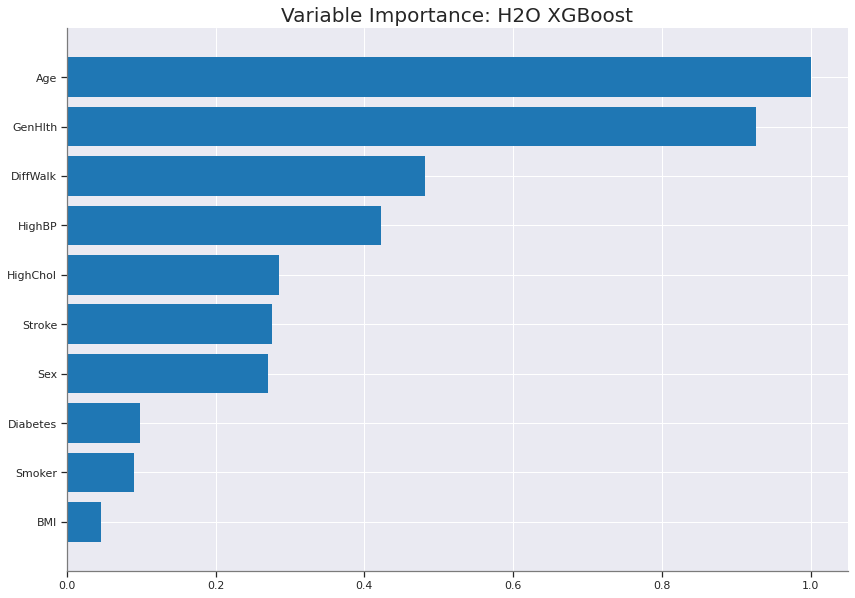

<Figure size 432x288 with 0 Axes>

In [259]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()


5
glm


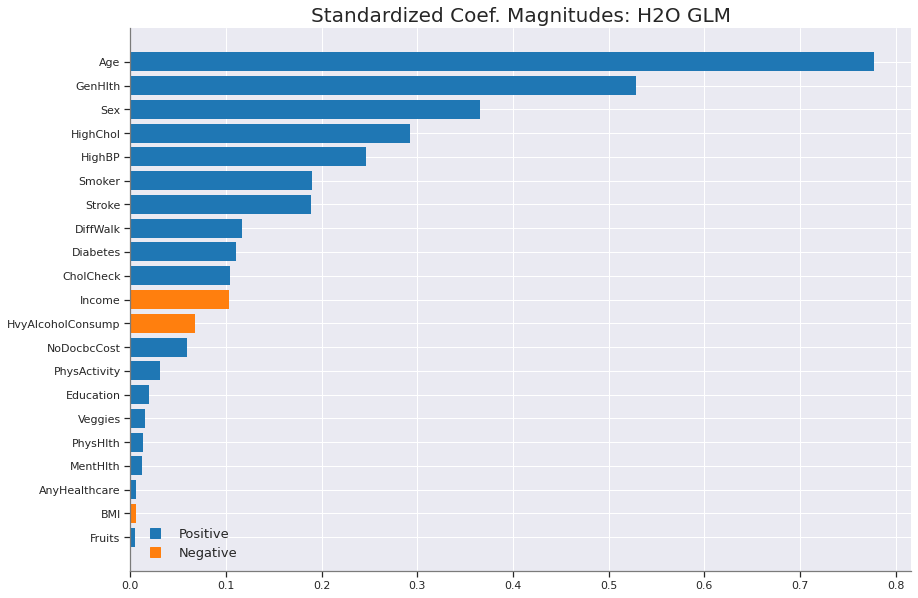

In [260]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [261]:
print(best_model.rmse(train = True))

0.2631479360203503


In [262]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [263]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'auc': 0.8521241512420679,
 'gini': 0.7042483024841357,
 'logloss': 0.23776387501438526,
 'mse': 0.07055967488794875,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.2656307114923814}

In [264]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [265]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict,p0,p1
0,1,0.703009,0.296991
1,1,0.712496,0.287504
2,0,0.815213,0.184787
3,0,0.989964,0.010036
4,1,0.651803,0.348197


In [266]:
y_test=h2o.as_list(df_test['HeartDiseaseorAttack'])
y_test[0:5]

,HeartDiseaseorAttack
0,0
1,0
2,0
3,0
4,1


In [267]:
print(X)

['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [296]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv")
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


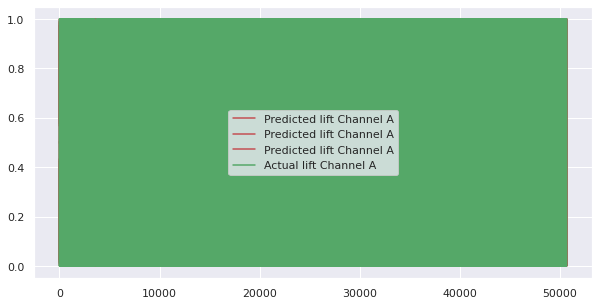

In [270]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_pred, color='r', label='Predicted lift Channel A')
plt.plot(y_test, color='g', label='Actual lift Channel A')
plt.legend()
plt.show()

In [271]:
y_train_mean=df_train['HeartDiseaseorAttack'].mean()[0]
print(y_train_mean)

0.09385205727768446


In [273]:
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_train_mean)
y_null[0:5]

array([[0.09385206],
       [0.09385206],
       [0.09385206],
       [0.09385206],
       [0.09385206]])

In [274]:
from sklearn import metrics
null_accuracy=np.sqrt(metrics.mean_squared_error(y_test,y_null))
print(null_accuracy)

0.29393922603861067


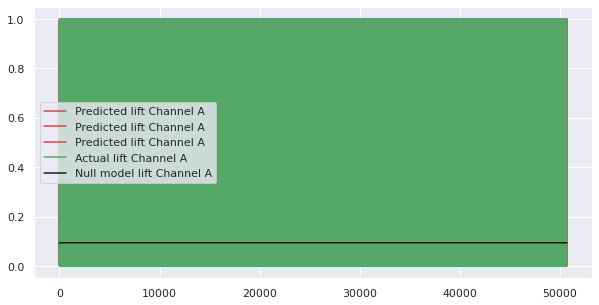

In [275]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_pred, color='r', label='Predicted lift Channel A')
plt.plot(y_test, color='g', label='Actual lift Channel A')
plt.plot(y_null, color='k', label='Null model lift Channel A')
plt.legend()
plt.show()

In [276]:
X

['HeartDiseaseorAttack',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [277]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math

In [278]:
df2 = pd.read_csv(r'https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv')

In [279]:
# np.random.seed(12)
# Pat_ages=stats.poisson.rvs(loc=18,mu=33,size=100)df.head()

In [280]:
df["Age"].mean()

[8.032119205297999]

In [281]:
# np.random.seed(12)
# pat_ages=stats.poisson.rvs(loc=18,mu=30,size=100)

#convert list to 1d array
ages=df2["Age"]
pay_tier=df2["GenHlth"]
pd=h2o.as_list(df)
ages_arr=pd["Age"].tolist()
paytier_arr=pd["GenHlth"].tolist()

print(ages_arr)

[9, 7, 9, 11, 11, 10, 9, 11, 9, 8, 13, 10, 7, 11, 4, 6, 10, 7, 2, 4, 12, 13, 5, 13, 9, 5, 10, 12, 8, 12, 9, 13, 6, 11, 12, 9, 8, 12, 4, 9, 4, 13, 7, 9, 8, 8, 7, 10, 10, 11, 9, 7, 10, 10, 4, 11, 6, 10, 11, 7, 11, 11, 9, 7, 10, 11, 8, 13, 10, 7, 12, 7, 7, 7, 1, 6, 8, 12, 11, 8, 7, 7, 13, 13, 10, 9, 1, 8, 5, 13, 10, 3, 11, 11, 5, 9, 3, 9, 11, 7, 9, 12, 9, 9, 6, 10, 8, 7, 10, 7, 4, 13, 9, 8, 8, 3, 11, 6, 7, 7, 7, 7, 10, 10, 5, 6, 12, 7, 7, 13, 4, 8, 11, 8, 12, 11, 10, 12, 5, 9, 1, 9, 11, 8, 8, 12, 9, 7, 11, 12, 8, 12, 12, 8, 10, 5, 11, 13, 9, 8, 10, 9, 8, 8, 11, 10, 8, 10, 8, 12, 10, 12, 7, 7, 10, 4, 10, 13, 8, 7, 7, 13, 5, 11, 9, 8, 7, 8, 10, 9, 9, 9, 10, 7, 11, 9, 12, 12, 8, 6, 6, 11, 7, 9, 7, 12, 13, 6, 13, 7, 9, 6, 10, 4, 8, 6, 8, 12, 9, 10, 2, 8, 12, 8, 6, 5, 12, 10, 10, 12, 7, 6, 11, 8, 9, 8, 12, 12, 8, 11, 11, 10, 13, 6, 12, 7, 6, 7, 13, 10, 13, 13, 9, 12, 9, 9, 10, 7, 8, 10, 13, 10, 8, 8, 12, 11, 11, 10, 10, 11, 5, 5, 11, 9, 10, 8, 10, 10, 4, 10, 4, 9, 10, 10, 7, 9, 7, 11, 8, 11, 1

In [282]:
sample_size=100
sample_age = np.random.choice(ages_arr,sample_size)

In [283]:
ttest,p_value=stats.ttest_1samp(ages_arr,30)
print(p_value)

0.0


In [292]:
import pandas as pd
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [284]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [285]:
df3 = pd.read_csv("https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv")
df3 = df3[~df3.isin([np.nan, np.inf, -np.inf]).any(1)]
X_variables = df3[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity','GenHlth', 'PhysHlth','Age']]

In [286]:
print(X_variables)

        HighBP  HighChol  CholCheck  ...  GenHlth  PhysHlth   Age
0          1.0       1.0        1.0  ...      5.0      15.0   9.0
1          0.0       0.0        0.0  ...      3.0       0.0   7.0
2          1.0       1.0        1.0  ...      5.0      30.0   9.0
3          1.0       0.0        1.0  ...      2.0       0.0  11.0
4          1.0       1.0        1.0  ...      2.0       0.0  11.0
...        ...       ...        ...  ...      ...       ...   ...
253675     1.0       1.0        1.0  ...      3.0       5.0   5.0
253676     1.0       1.0        1.0  ...      4.0       0.0  11.0
253677     0.0       0.0        1.0  ...      1.0       0.0   2.0
253678     1.0       0.0        1.0  ...      3.0       0.0   7.0
253679     1.0       1.0        1.0  ...      2.0       0.0   9.0

[253680 rows x 11 columns]


In [287]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [288]:
print(vif_data)

         feature        VIF
0         HighBP   2.266468
1       HighChol   2.030559
2      CholCheck  17.534407
3            BMI  15.099883
4         Smoker   1.860159
5         Stroke   1.097934
6       Diabetes   1.378143
7   PhysActivity   3.981528
8        GenHlth   9.995863
9       PhysHlth   1.720109
10           Age   8.478171


In [308]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(X, y)
clf.fit(X, y) #We can fit Ridge Classifier to the dataset in this way too
clf.score(X, y) #Return the mean accuracy on the given test data and labels
cfl.predict(X) #Return the predictions

#Classification Metrics
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(X, y)

ValueError: ignored

In [310]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [311]:
df = pd.read_csv('https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv') 
print(df.shape)
df.describe()

(253680, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [312]:
target_column = ['HeartDiseaseorAttack'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,0.289616,0.443169,0.040571,0.148461,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,0.502278,0.106159,0.141403,0.168224,0.440342,0.617855,0.841739,0.756734
std,0.292087,0.494934,0.494210,0.189571,0.067436,0.496761,0.197294,0.349080,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,0.213695,0.247095,0.290598,0.374066,0.496429,0.234940,0.164296,0.258893
min,0.000000,0.000000,0.000000,0.000000,0.122449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.076923,0.166667,0.125000
25%,0.000000,0.000000,0.000000,1.000000,0.244898,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.461538,0.666667,0.625000
50%,0.000000,0.000000,0.000000,1.000000,0.275510,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.615385,0.833333,0.875000
75%,0.000000,1.000000,1.000000,1.000000,0.316327,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.600000,0.066667,0.100000,0.000000,1.000000,0.769231,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [313]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(177576, 21)
(76104, 21)


In [314]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [315]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

0.26936454748756194
0.14952898483367716
0.2694418587694863
0.14905591738772384


In [316]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.2693645474875942
0.14952898483347332
0.2694418594941913
0.149055912810236


q1 Is the relationship significant?
q2 Are any model assumptions violated?
q3 Is there any multicollinearity in the model?

q4 In the multivariate models are predictor variables independent of all the other predictor variables?

q5 In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

q6 Does the model make sense?
q7  Does regularization help?
q8  Which independent variables are significant?
q9  Which hyperparameters are important?

Copyright(c) Rochak